<a href="https://colab.research.google.com/github/gsangf10/Analysis_Algorithm/blob/main/Analysis_%EB%AC%B8%EC%A0%9C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심부전증 증세로 사망 확률 예측


In [ ]:
# 각 특성 데이터 설명
# age : 환자의 나이
# anaemia : 환자의 빈혈증 여부(0: 정상, 1: 빈혈)
# creatinine_phosphokinase: 크레아틴키나제 검사 결과
# diabetes : 당뇨 여부 (0: 정상, 1: 당뇨)
# ejection_fraction : 박출계수(%)
# high_blood_pressure : 고혈압여부 (0: 정상, 1: 고혈압)
# platelets : 혈소판 수 (kiloplatelets/mL)
# serum_creatinine : 혈중 크레아틴 레벨(mg/dL)
# serum_sodium : 혈중 나트륨 레벨(mEq/L)
# sex : 성별(0: 여성, 1: 남성)
# smoking : 흡연 여부 (0: 비흡연, 1: 흡연)
# time : 관찰기관(일)
# DEATH_EVENT : 사망 여부 (0: 생존, 1: 사망)

# 1. 판다스로 데이터 읽어오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Big_Data/dataset/heart_failure_clinical_records_dataset.csv')

# 2. 데이터의 개수, 데이터 타입, 결측치 확인

In [ ]:
# df.info()
df.columns
df.count()
df.dtypes
df.isnull().sum()

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# 3. 시각화를 이용한 탐색적 분석
- 히스토그램을 이용해 각 수치데이터의 데이터 분포 및 상관관계 확인하기

[ 0  0  1  0  0  6  1  0  2  1  8  1  0  1  1  3  0  1  2  3 13  1  0  1
  0  0  8  0  0  2  2  7  5  1  6  1  0  0  5  0  3  3  1  1  2  1  2]


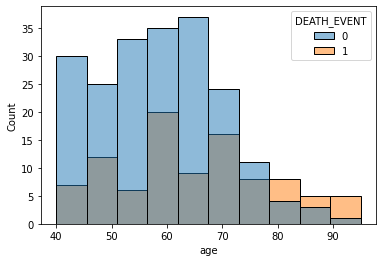

In [ ]:
import seaborn as sn

# sn.histplot(x='age', data=df)
sn.histplot(x='age', data=df, hue='DEATH_EVENT')

print(df.groupby(df['age']).sum()['DEATH_EVENT'].values)

# 4. 수치 데이터 정규화하기
- 정규화 하기 전에 카테고리형 데이터는 빼고 수치형 데이터만 정규화하기.
- 정규화된 수치형 데이터와 카테고리형 데이터를 다시 붙이기

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# 수치형 데이터
n_col = df.loc[:,(df.nunique() != 2) & (df.columns != 'time')].columns
n_data = df[n_col]

# 카테고리형 데이터
c_col = df.loc[:,(df.nunique() == 2) & (df.columns != 'DEATH_EVENT')].columns
c_data = df[c_col]

# 타겟
target = df['DEATH_EVENT']

ss.fit(n_data)
ndata_s = ss.transform(n_data)

cdata_arr = c_data.values
data = np.concatenate((ndata_s, cdata_arr), axis=1)

# 5. 훈련데이터와 타겟(정답)데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split

trd, tsd, trt, tst = train_test_split(data, target, random_state=1)

# 6. 학습용 데이터와 테스트용 데이터로 나누기

In [ ]:
# 5번 항목에서 동시진행

# 7. 로지스틱 회귀를 이용해 학습하고 평가하기

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(trd, trt)
print(lr.score(trd, trt), lr.score(tsd, tst))

0.7455357142857143 0.7866666666666666


# 8. 데이터와 death와의 상관관계를 막대그래프로 그리고 가장 높은 특성을 3개 확인

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

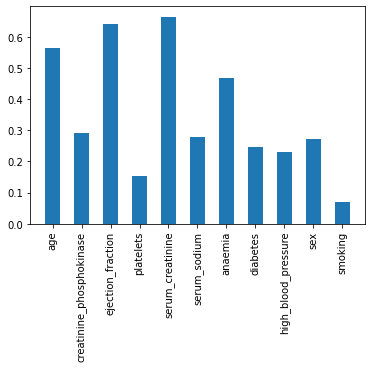

In [ ]:
coefs = lr.coef_

coefs = coefs.reshape(-1)
# cols = df.iloc[:,:-1].columns.values
cols = np.concatenate((n_col.values, c_col.values), axis=0)
coef_sr = np.abs(pd.Series(coefs, index=cols))

plt.bar(coef_sr.index, coef_sr, width=0.5)
plt.xticks(rotation=90)

# 9. time 특성은 학습용 특성으로 적합하지 않음. 제거한 후  확률 경사 하강법으로 학습하기 

In [ ]:
# sn.histplot(x='time', data=df, hue='DEATH_EVENT')

# 4번에서 time 특성 제거

# 경사 하강법
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', random_state=1)

# tr_list = []
# ts_list = []
# for i in range(700):
#   sc.partial_fit(trd, trt, classes=np.unique(target))
#   tr_list.append(sc.score(trd, trt))
#   ts_list.append(sc.score(tsd, tst))

# plt.plot(tr_list)
# plt.plot(ts_list)

sc = SGDClassifier(loss='log', max_iter=700, tol=None, random_state=1)
sc.fit(trd, trt)

print(sc.score(trd, trt), sc.score(tsd, tst))

0.75 0.76


# 10. 입력된 증세로 사망확률 예측

In [ ]:
tst_n = [[75, 582, 20, 265000, 1.9, 130]]
tst_c = [0, 0, 1, 1, 0]

tst_ns = ss.transform(tst_n)[-1]

tst_data = np.concatenate((tst_ns, tst_c), axis=0)
tst_data = tst_data.reshape(1,-1)

# 로지스틱 회귀 분석으로 예측한 결과
print(lr.predict(tst_data)) # 예측 결과 (0: 생존, 1: 사망)
print(lr.predict_proba(tst_data)) # 사망 확률

# 경사하강법으로 예측한 결과
print(sc.predict(tst_data)) # 예측 결과 (0: 생존, 1: 사망)
print(sc.predict_proba(tst_data)) # 사망 확률

[1]
[[0.22017503 0.77982497]]
[1]
[[0.13153415 0.86846585]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
